# Newton Integration Root Finding

In [1]:
import numpy as np
from polyrand.rootfinder import *
import matplotlib.pyplot as plt
%matplotlib inline


### Fractional Antiderivative

$\frac{\Gamma(k)}{\Gamma(k+a)} c_k x^{k+a} + \frac{\Gamma(k-1)}{\Gamma(k-1+a)} c_{k-1} x^{k-1+a} + \cdots + c_0 x^a + C$

$x^a (\frac{\Gamma(k)}{\Gamma(k+a)} c_k x^{k} + \frac{\Gamma(k-1)}{\Gamma(k-1+a)} c_{k-1} x^{k-1} + \cdots + c_0 x + C)$

$x^a (\sum_{i=0}^{k} \frac{\Gamma(k-i)}{\Gamma(k-i+a)} c_{k-i} x^{k-i} + C)$

Let $G_{k,a} = \frac{\Gamma(k)}{\Gamma(k+a)}$, then 

$x^a (\sum_{i=0}^{k} G_{k-i,a} c_{k-i} x^{k-i} + C)$

**Newton Integration**

1) Get coefficients of the polynomial to be solved.

2) Differentiate down to a polynomial $d^np$ whose roots are known.

3) Find the fractional antiderivative $d^{n+a}p$ where $a \in (0,1]$.

4) Find the roots of $d^{n+a}p$ using newton's method with the roots of $d^np$ as the guess.

5) Update roots by repeating steps 3 and 4.

In [2]:
def newton_integration_x(coeffs,dx,n_steps=3):
    """
    NIRF (Integration)
    NERF (Eigenvalue)
    NARF (Antiderivative)
    N*RF (Newton * Root Finding)
    Use newton's method to integrate the roots of a polynomial up to a different polynomial.
    
    """
    A = cheb_nodes(0,dx,n_steps)
    
    plt.figure(figsize=(8,8))
    
    # plot the solution we hope to get to
    R = np.polynomial.polynomial.Polynomial(coeffs).roots()
    plt.scatter(R.real,R.imag,color='k',alpha=.5)
    
    # degree of polynomial
    d = len(coeffs) - 1
    
    # Find known roots of a derivative
    df = frac_deriv(coeffs,dx)
    Roots = np.linalg.eig(df)[0]
    plt.scatter(Roots.real,Roots.imag,color='r',alpha=.5)
    
    frac_antideriv(-1*df[:,-1])

#     for a in A:
#         # define the function to optimize
#         F = frac_antideriv(-1*df[:,-1],a,coeffs[:dx])
#         P = np.polynomial.polynomial.Polynomial(F)

#         # Newton's method to find roots of function to optimize
#         for r in Roots: # which are roots of P0
#             z = newton(P,np.complex128(r))
#             plt.scatter(z.real,z.imag,color='orange',alpha=.2)
            
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.show()

TypeError: frac_antideriv() missing 2 required positional arguments: 'a' and 'const'

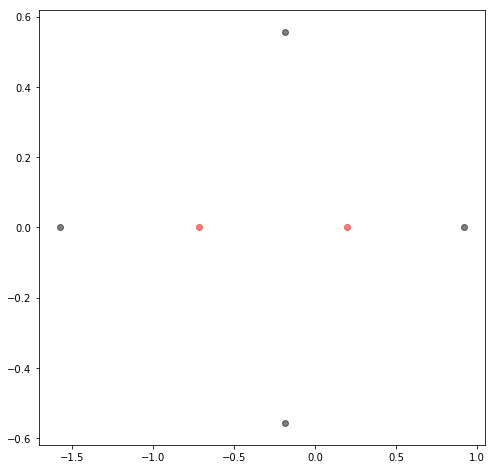

In [3]:
coeffs = np.random.randn(5)
coeffs[-1] = 1.
P = np.polynomial.polynomial.Polynomial(coeffs)

R = newton_integration_x(coeffs,2)

In [ ]:
plt.scatter(cheb_nodes(0,2,100),np.zeros(100),alpha=.1)